In [ ]:
# Connect colab to google drive
# Since this project uses my google drive, you will have to upload the required files to your google drive for this to work. Alternatively, you can change the file locations to the dataset paths  
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Specify path for dataset

train_path = '/content/drive/My Drive/sentiment_analysis/Train.csv'
validate_path = '/content/drive/My Drive/sentiment_analysis/Valid.csv'
test_path = '/content/drive/My Drive/sentiment_analysis/Test.csv'

In [ ]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)

# Use pandas to read csv files
train_data = pd.read_csv(train_path).head(2000) #Taking first 2000 values
valid_data = pd.read_csv(validate_path).head(200) #Taking first 200 values
test_data = pd.read_csv(test_path).head(200) #Taking first 200 values

train_data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
# Convert sentences to lowercase

train_data['text'] = train_data['text'].str.lower()
valid_data['text'] = valid_data['text'].str.lower()
test_data['text'] = test_data['text'].str.lower()
train_data.head()

,text,label
0,i grew up (b. 1965) watching and loving the th...,0
1,"when i put this movie in my dvd player, and sa...",0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [ ]:
# Remove Punctuations

train_data['text'] = train_data['text'].str.replace('[^\w\s]','')
valid_data['text'] = valid_data['text'].str.replace('[^\w\s]','')
test_data['text'] = test_data['text'].str.replace('[^\w\s]','')
train_data.head()


,text,label
0,i grew up b 1965 watching and loving the thund...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [ ]:
# Remove stopwords like i, in, at, ...
from nltk.corpus import stopwords
import nltk 
nltk.download('stopwords')

stop = stopwords.words('english')

train_data['text'] = train_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
valid_data['text'] = valid_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test_data['text'] = test_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
train_data.head()

# You can apply Stemming or Lemmatizing after this. I haven't applied it for this particular project

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,label
0,grew b 1965 watching loving thunderbirds mates...,0
1,put movie dvd player sat coke chips expectatio...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # term frequency inverse document frequency

# Create feature vectors for every sentence 
vectorizer = TfidfVectorizer(max_features = 20000, sublinear_tf = True, use_idf = True)

train_vectors = vectorizer.fit_transform(train_data['text'])
valid_vectors = vectorizer.transform(valid_data['text'])
test_vectors = vectorizer.transform(test_data['text'])

# print(valid_vectors[1])

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Defining the NN model
model = Sequential()
model.add(Dense(20, input_shape=(train_vectors.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1)
]

history = model.fit(
    train_vectors.toarray(), train_data['label'], 
    epochs=20, 
    verbose=1,
    callbacks = callbacks_list,
    validation_data=(valid_vectors.toarray(), valid_data['label']))

Epoch 1/20
63/63 [==============================] - 2s 10ms/step - loss: 0.6785 - accuracy: 0.7075 - val_loss: 0.6471 - val_accuracy: 0.8150

Epoch 00001: val_loss improved from inf to 0.64714, saving model to model.h5
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 0.5842 - accuracy: 0.9160 - val_loss: 0.5749 - val_accuracy: 0.8600

Epoch 00002: val_loss improved from 0.64714 to 0.57491, saving model to model.h5
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 0.4589 - accuracy: 0.9600 - val_loss: 0.5036 - val_accuracy: 0.8550

Epoch 00003: val_loss improved from 0.57491 to 0.50361, saving model to model.h5
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 0.3424 - accuracy: 0.9760 - val_loss: 0.4463 - val_accuracy: 0.8600

Epoch 00004: val_loss improved from 0.50361 to 0.44625, saving model to model.h5
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 0.2515 - accuracy: 0.9855 - val_loss: 0.40

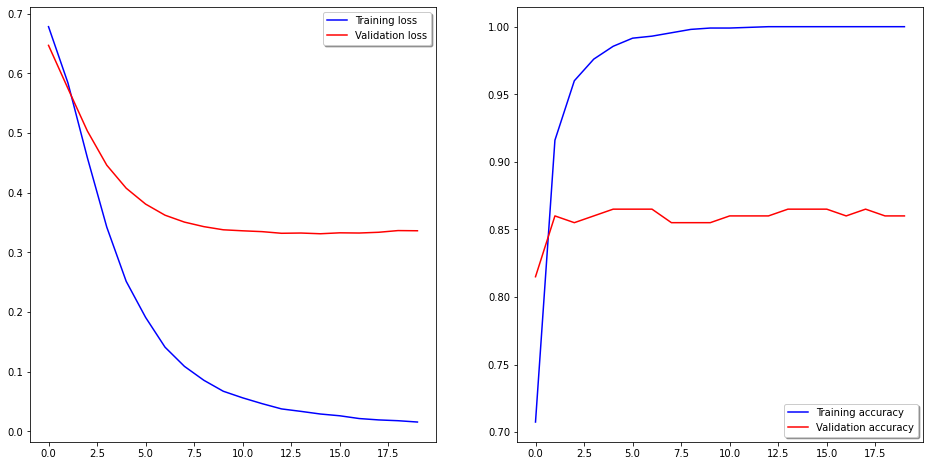

In [ ]:
# Plot Loss graph and Accuracy Graph

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
# Load the saved model
model = load_model('model.h5')

# Results against test data
y_pred = model.predict(test_vectors.toarray())
y_pred = np.round(y_pred).astype(int)

print(classification_report(test_data['label'], y_pred, target_names=['Negative Review','Positive Review']))

                 precision    recall  f1-score   support

Negative Review       0.90      0.92      0.91       110
Positive Review       0.90      0.88      0.89        90

       accuracy                           0.90       200
      macro avg       0.90      0.90      0.90       200
   weighted avg       0.90      0.90      0.90       200

